# `xr_add_cyclic_longitudes`

This notebook is a simple example of the GeoCAT-viz function <a href="../user_api/generated/geocat.viz.util.xr_add_cyclic_longitudes.html#geocat-viz.util.xr_add_cyclic_longitudes">xr_add_cyclic_longitudes</a>.

In [2]:
# Import packages:

import numpy as np
import xarray as xr
from cartopy.mpl.gridliner import LatitudeFormatter, LongitudeFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt

import geocat.datafiles as gdf
import geocat.viz as gv

In [3]:
# Read in the data:

# Open a netCDF data file using xarray default engine and load the data into xarrays
ds = xr.open_dataset(gdf.get("netcdf_files/b003_TS_200-299.nc"),
                     decode_times=False)

# Extract slice of the data
temp = ds.TS.isel(time=43).drop_vars(names=['time'])
# Convert from Celsius to Kelvin
temp.data = temp.data - 273.15

# Fix the artifact of not-shown-data around 0 and 360-degree longitudes
temp = gv.xr_add_cyclic_longitudes(temp, "lon")

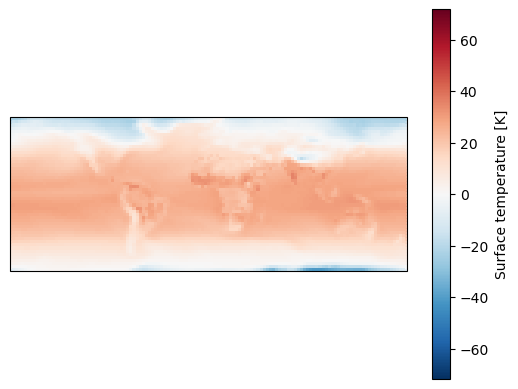

In [12]:
# Create plot

# Generate figure (set its size (width, height) in inches)
plt.figure()

# Generate axes using Cartopy projection
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.set_extent([-180, 180, -70, 70], crs=projection)

temp.plot(ax=ax)

plt.show();

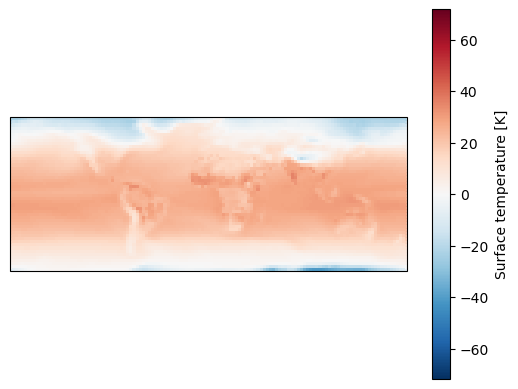

In [13]:
# Create plot

temp2 = ds.TS.isel(time=43).drop_vars(names=['time'])
# Convert from Celsius to Kelvin
temp2.data = temp2.data - 273.15


# Generate figure (set its size (width, height) in inches)
plt.figure()

# Generate axes using Cartopy projection
projection = ccrs.PlateCarree()
ax = plt.axes(projection=projection)
ax.set_extent([-180, 180, -70, 70], crs=projection)

temp2.plot(ax=ax)

plt.show();

In [14]:
temp2

<xarray.DataArray 'TS' (lat: 64, lon: 128)>
array([[-53.96846 , -54.386124, -54.78691 , ..., -52.805954, -53.199158,
        -53.57965 ],
       [-50.74008 , -51.74817 , -52.748703, ..., -47.894623, -48.79953 ,
        -49.756836],
       [-47.972992, -49.628662, -51.321823, ..., -43.300415, -44.72911 ,
        -46.31662 ],
       ...,
       [-21.319443, -21.191544, -21.149353, ..., -21.665894, -21.607452,
        -21.509232],
       [-20.20166 , -20.197937, -20.187912, ..., -19.916412, -20.049316,
        -20.154037],
       [-20.260498, -20.283234, -20.316376, ..., -20.111542, -20.186844,
        -20.230957]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -87.86 -85.1 -82.31 -79.53 ... 79.53 82.31 85.1 87.86
  * lon      (lon) float32 0.0 2.812 5.625 8.438 ... 348.8 351.6 354.4 357.2
Attributes:
    long_name:  Surface temperature
    units:      K
    t_op:       average